# Exploratory Data Analysis for Planetary Bodies 

### Imports

In [4]:
from scripts_final import project_functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data Set

In [5]:
df = project_functions.load_and_process("../../data/raw/nomenclature.csv")


df.head(10)

,index,Planet Name,ID,FeatureName,FeatureType,Planetary Feature,Latitude of Center of Planetary Feature,Longitude of Center of Planetary Feature,Size of Planetary Feature(km)
0,1357,Mars,4574.0,Pandorae Fretum,albedo feature,AL,-24.741878,44.0,0.0
1,1459,Mars,6596.0,Xanthe,albedo feature,AL,9.884955,310.0,0.0
2,1168,Mars,2132.0,Gehon,albedo feature,AL,14.831743,360.0,0.0
3,1462,Mars,6639.0,Yaonis Regio,albedo feature,AL,-39.667248,40.0,0.0
4,1165,Mars,4213.0,Nereidum Fretum,albedo feature,AL,-44.661768,305.0,0.0
5,1164,Mars,583.0,Baltia,albedo feature,AL,59.706215,310.0,0.0
6,1466,Mars,6719.0,Zephyria,albedo feature,AL,0.000000,165.0,0.0
7,1159,Mars,388.0,Arnon,albedo feature,AL,47.663413,25.0,0.0
8,1157,Mars,335.0,Arabia,albedo feature,AL,19.783566,30.0,0.0
9,1156,Mars,312.0,Aonium Sinus,albedo feature,AL,-44.661768,255.0,0.0


## Research Questions

1. How do the surfaces of the Moon, Mars, and Venus differ from each other ? 


2. Is there a correlation between crater impact location, and crater size?


3. How to the sizes of the planetary features relate for each body?




# **Q1. How do the Surfaces of the Moon, Mars, and Venus differ from each other ?**

*Side Note: The Moon, Venus, and Mars, were selected for further surface analysis because the data set included the most feature data for these bodies. In addition, these planet bodies are more familiar to the average person compared to other planet bodies in this dataset. *

In order to investigate the surfaces of these bodies, surface maps were created to plot the longitude and latitude coordinates of each feature. The x-axis is the longitude (angular distance East to West) and the y-axis is latitude (angular distance North to South). These coordinates, unlike coordinates on earth, are measured on a different scale. For longitude, the degree ranges from [0-360] degrees and for latitude ranges between [-90,90] degrees. This coordinate system is used because features are plotted based off of observation, making this coordinate system more suitable. Unfortunately, these maps are NOT to scale, transforming this data onto an ellipse was far too complicated. These maps provide a good idea of the different features present on each planet body which will be enough to evaluate this research question.  


### Surface Map of the Moon:

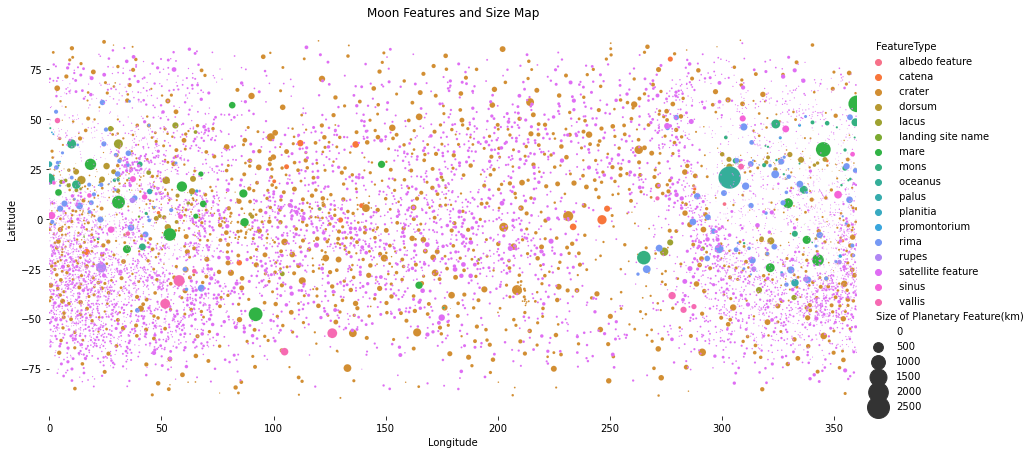

In [6]:
moondata = df[df['Planet Name']=='Moon']

moon_feat_size_map = sns.relplot(
    data=moondata,
    y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
    hue="FeatureType", size="Size of Planetary Feature(km)",
    sizes=(0, 500),aspect =2,height=6, legend=True)
moon_feat_size_map.set(title='Moon Features and Size Map')
moon_feat_size_map.set(xlim=(0, 360))
moon_feat_size_map.set_xlabels("Longitude", size=10)
moon_feat_size_map.set_ylabels("Latitude", size=10)
moon_feat_size_map.despine(left=True, bottom=True)



This surface map shows how the moon differs from Venus and Mars. One key insight drawn from the Moon surface map is the abundance of satellite features it has compared to the other two bodies. The moon also has very large dark spot, which is called an "Oceanus" (located on the right side of the plot) that does not exist on Mars or Venus. The surface mostly consists of craters and catena (chains of craters) on its surface. On the left side of the map, we see green spots on the surface of the moon are called, mare, these features represent smooth plains also called a "sea". In addition, there are a lot of blue spots which represent Rima, fissures, these are cracks on the surface. The surface of the moon could be described as smooth, no increases in elevation, although it has a rough surface with a lot of craters and cracks.


### Surface Map of Venus:

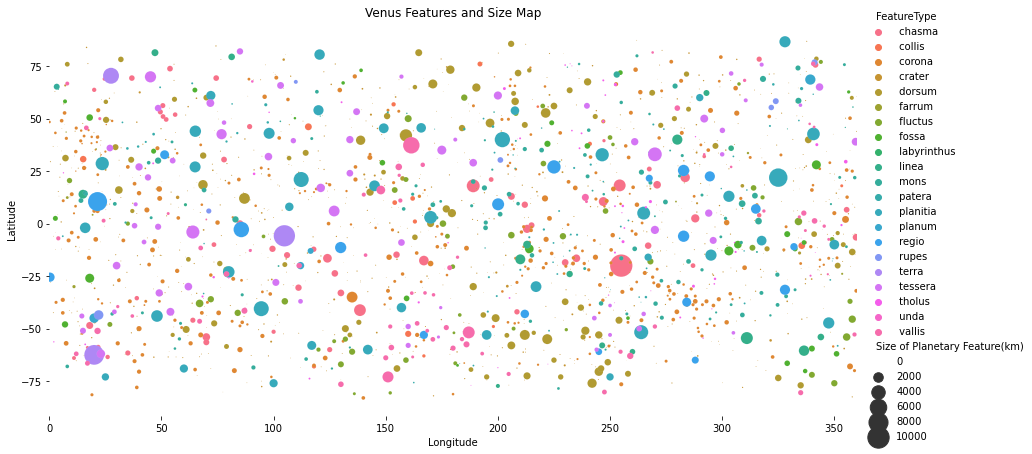

In [7]:
venusdata = df[df['Planet Name'] == 'Venus']


venus_feat_size_map = sns.relplot(
    data=venusdata,
    y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
    hue="FeatureType", size="Size of Planetary Feature(km)",
     sizes=(0, 500),aspect=2,height=6)
venus_feat_size_map.set(title='Venus Features and Size Map')
venus_feat_size_map.set(xlim=(0, 360))
venus_feat_size_map.set_xlabels("Longitude", size=10)
venus_feat_size_map.set_ylabels("Latitude", size=10)
venus_feat_size_map.despine(left=True, bottom=True)



This surface map highlights some of the key differences Venus has with the other two bodies. Some of the larger and abundant features on Venus include chasma (deep-elongated depressions), mons(mountains), fossa (long narrow depressions), and terra (extensive land masses). The many depressions along with the many mountains on the surface indicate that Venus has rugged terrain. The elevation changes across the entire surface. In addition to these features, Venus has craters scattered on the surface, especially in the central southern part of the surface map.

### Surface Map of Mars:

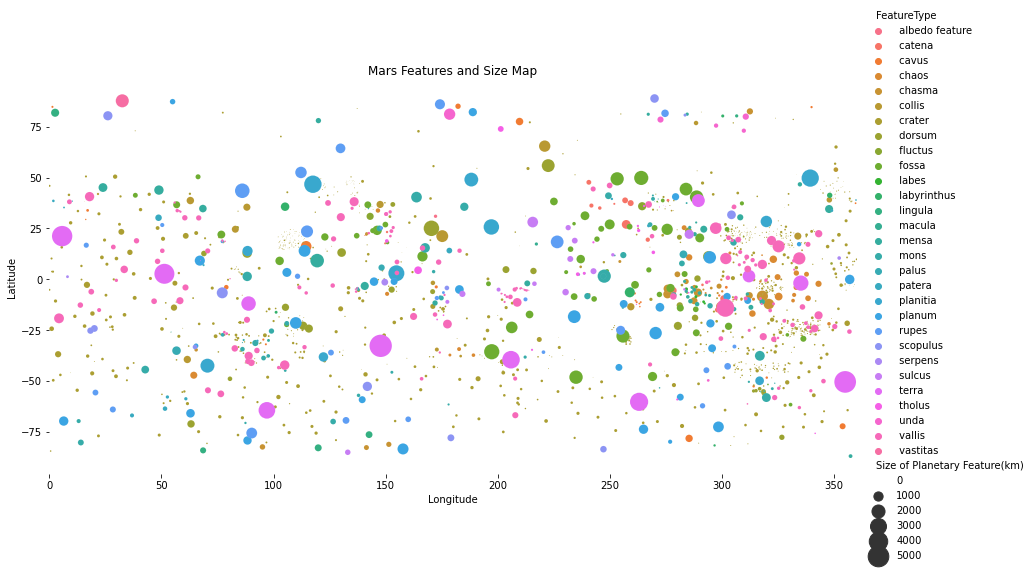

In [8]:
marsdata = df[df['Planet Name']== 'Mars']

mars_feat_size_map = sns.relplot(
    data=marsdata,
    y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
    hue="FeatureType", size="Size of Planetary Feature(km)",
    sizes=(0, 500),aspect=2,height=6)
mars_feat_size_map.set(title='Mars Features and Size Map')
mars_feat_size_map.set(xlim=(0, 360))
mars_feat_size_map.set_xlabels("Longitude", size=10)
mars_feat_size_map.set_ylabels("Latitude", size=10)
mars_feat_size_map.despine(left=True, bottom=True)

The surface map of Mars illustrates some key features it has compared to the others. The largest and most abundant features are terra (large-extensive land mass) illustrated in purple. Another prevalent feature are rupes (plateaus) shown in blue. A unique feature on Mars is numerous landslides along the surface (labes) on the left side of the surface map. The surface Mars is more mountainous in comparison to the Moon, although not as much as Venus. 

### Overall Insights

The surfaces of these planet bodies are different from each other. The moon has a lot of satellite features along with numerous large plains of craters. Out of the three planets it is clear that the moon has a flatter surface. Its dark spot on the surface is its unique feature. The other planet body analyzed was Venus. The surface was the most rugged of the three because of the numerous mountains and depressions on the surface. Lastly, Mars has many plateaus and large land masses on the surface. Although, it is less rugged than the moon, it is much smoother than the surface of Venus. Its unique features include landslides and clustered crater regions.

# **Q2. Is there a correlation between crater impact location, and crater size?**


In [9]:
a = df['Planet Name'].unique()
for i in a:
  
    test = df[df['Planet Name'] ==i]
    test2 = test[test['FeatureType'] == ' crater '].size
    if test2 > 1000:
        print(test2)
        print(i)

10143
Mars
14202
Moon
3744
Mercury
1152
Rhea
1161
Ganymede
1035
Ceres
1269
Callisto
7929
Venus


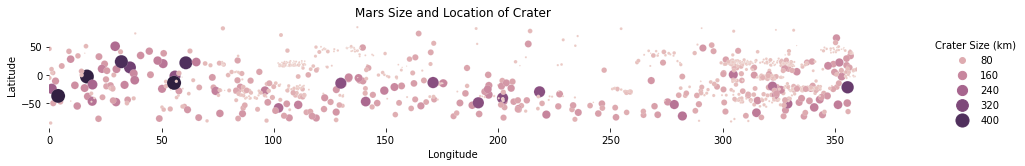

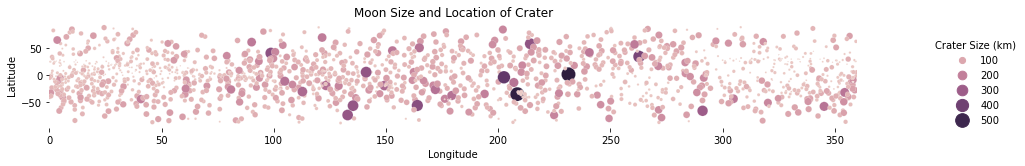

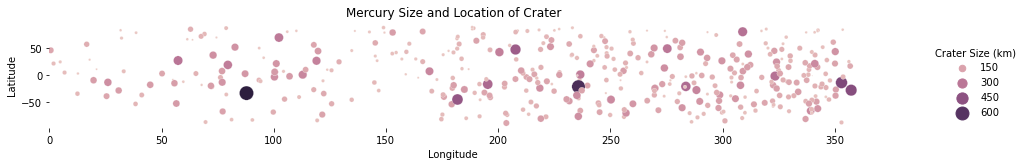

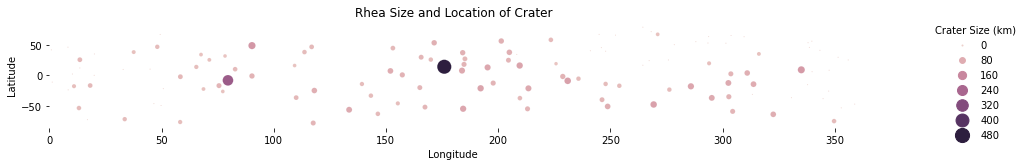

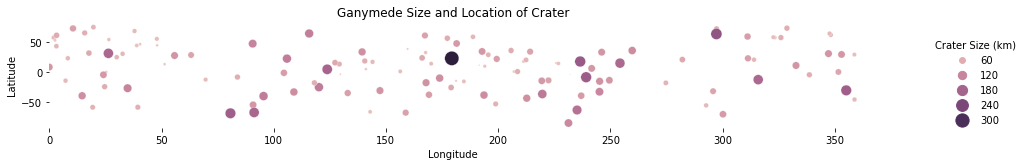

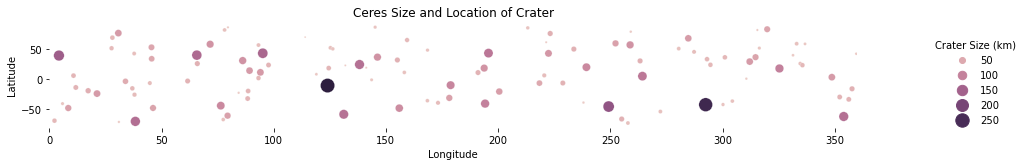

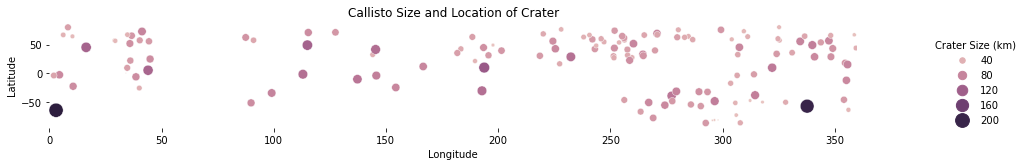

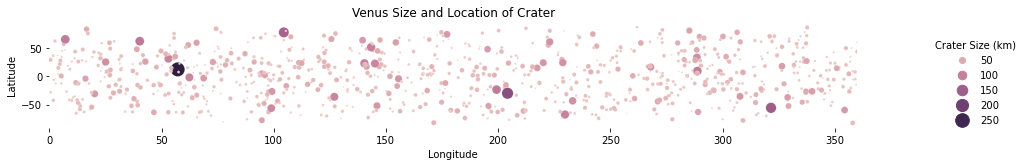

In [10]:
a = df['Planet Name'].unique()

for i in a:
    test = df[df['Planet Name'] ==i]
    test2 = test[test['FeatureType'] == ' crater '] 
  
    test3 = test[test['FeatureType'] == ' crater '].size 
    
    if test3 > 1000:  
        c = sns.color_palette("flare", as_cmap=True)
        
        moon_feat_size_map = sns.relplot(
        data=test2,
        y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
        size="Size of Planetary Feature(km)",hue = "Size of Planetary Feature(km)",
        sizes=(1, 200),height=2,aspect=6)
        moon_feat_size_map._legend.set_title("Crater Size (km)")
        moon_feat_size_map.set(title=(i+ " Size and Location of Crater"))
        moon_feat_size_map.set(xlim=(0, 360))
        moon_feat_size_map.ax.xaxis.grid(True, "minor", linewidth=.25)
        moon_feat_size_map.ax.yaxis.grid(True, "minor", linewidth=.25)
        moon_feat_size_map.set_xlabels("Longitude", size=10)
        moon_feat_size_map.set_ylabels("Latitude", size=10)
        moon_feat_size_map.despine(left=True, bottom=True)


These surface maps provide a visual for crator location and size. In general, these plots do not show any clear correlation between size and relative location. No matter the latitude or longitude the size of the crater appears to be random. In order to make a more thorough analysis will use a pairplot to see if there is any linear relationship between size and location. 

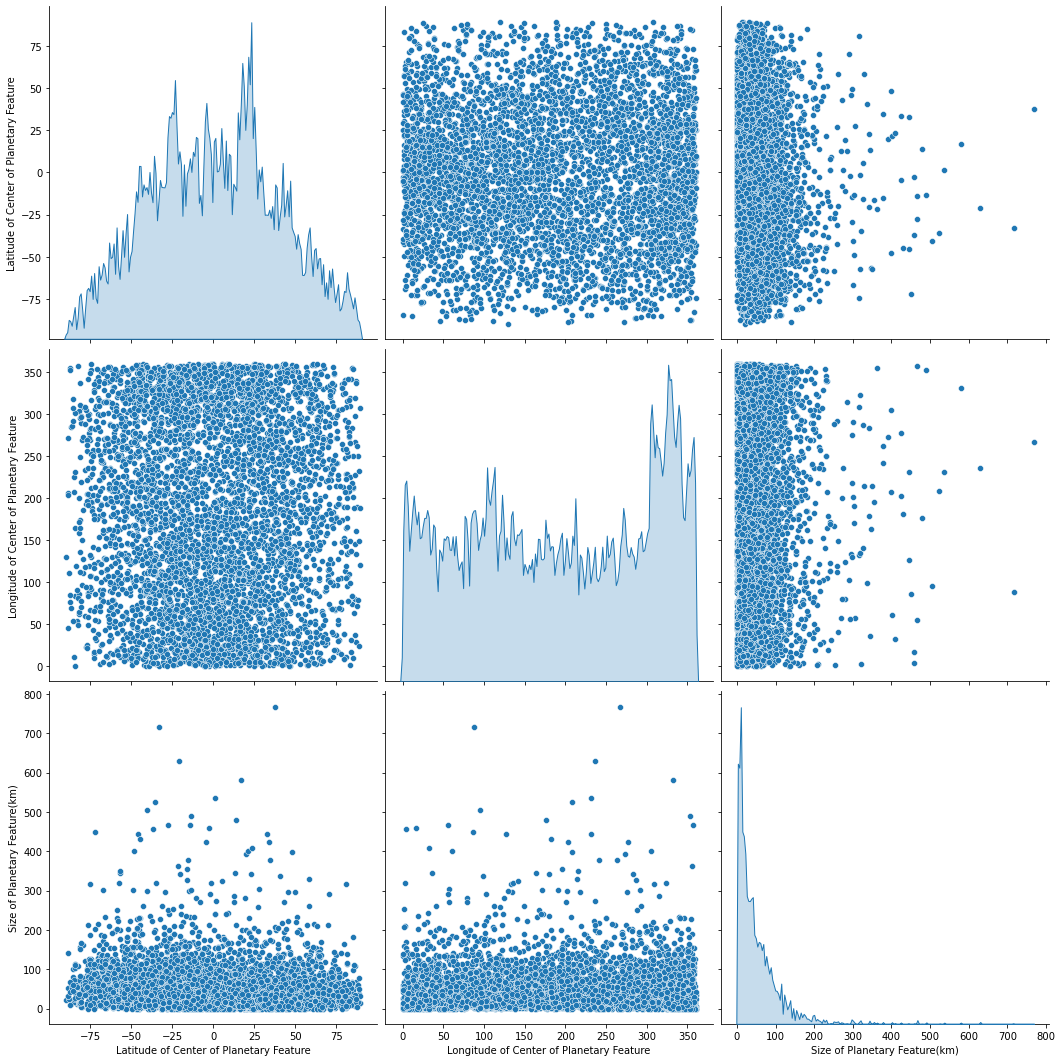

In [11]:
test4 = df[df['FeatureType'] == ' crater '].drop(["ID","index"],axis = 1) 
test5 = test4[(test4["Longitude of Center of Planetary Feature"]>0)]
correlplot = sns.pairplot(test5, diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=.05, vertical=False),height=5)

We have plotted the location and size of each crater on the planetary bodies with significant data, and can see visually that there is no correlation between location, size, or frequency of impacts. This lack of correlation can be seen through the linear regression analysis below. 

In [12]:
marsdata = df[df['Planet Name'] == "Mars"]
marscraterdata = marsdata[marsdata['FeatureType'] == ' crater '] 
venusdata = df[df['Planet Name'] == "Venus"]
venuscraterdata = venusdata[venusdata['FeatureType'] == ' crater '] 
names = df['Planet Name']
marsdata = df[df['Planet Name'] == "Mars"]
marscraterdata = marsdata[marsdata['FeatureType'] == ' crater '] 
model = LinearRegression(normalize = True)
x=marscraterdata["Latitude of Center of Planetary Feature"].iloc[:300].to_numpy().reshape(1, -1)
y=marscraterdata["Size of Planetary Feature(km)"].iloc[:300].to_numpy().reshape(1, -1)
x1=venuscraterdata["Latitude of Center of Planetary Feature"].iloc[:300].to_numpy().reshape(1, -1)
y1=venuscraterdata["Size of Planetary Feature(km)"].iloc[:300].to_numpy().reshape(1, -1)
model.fit(x,y)
print('slope:', model.coef_)
y_pred = model.intercept_ + model.coef_ * x1
print('predicted response:', y_pred, sep='\n')
r_sq = model.score(x1, y)
print('coefficient of determination:', r_sq)

slope: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
predicted response:
[[106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 ...
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]]
coefficient of determination: nan


/Users/edouard/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


As shown analytically by the linear regression model, there is insufficient data to reject the null hypothesis, meaning there is no   correlation between the location of a crater, and the crater size. 
There also appears to be no location that is hit more than others, this is because the R-squared value is close to zero

# **Q3. How do the sizes of the planetary features relate for each body?**


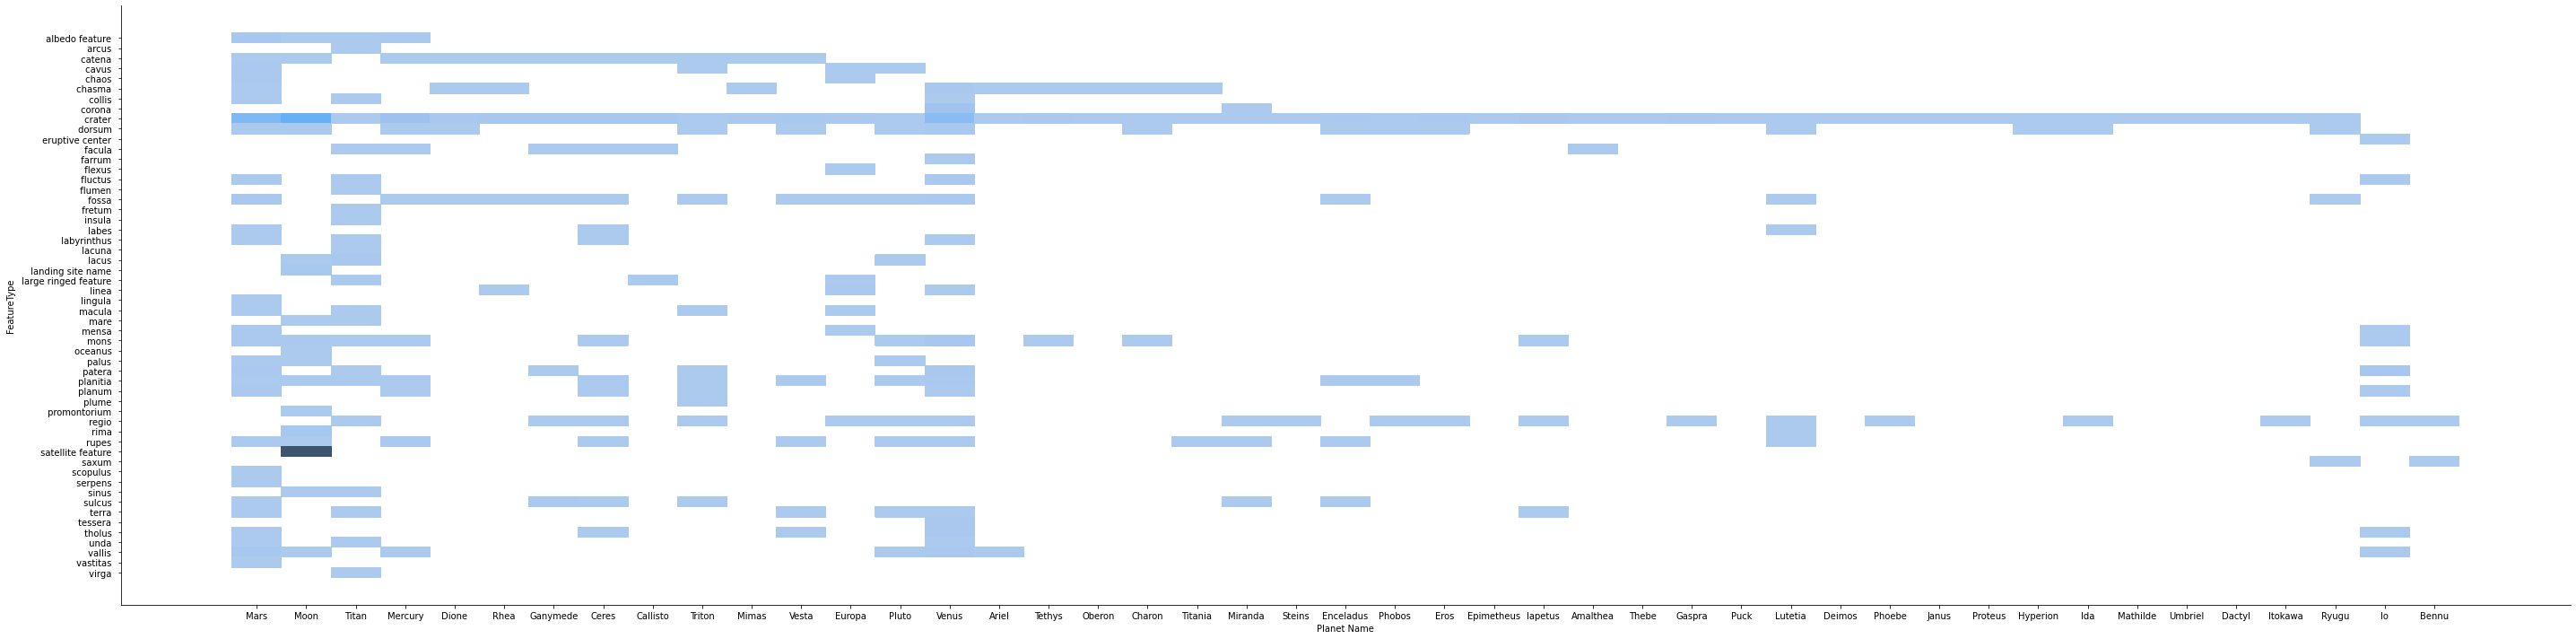

In [13]:
sns.displot(data=df, x='Planet Name', y='FeatureType', height= 10, aspect=4)

The above visualization creates a plot of each type of feature that appear on the body. Some planets have exclusive features while others have a wide variety of types. The opacity determines how frequent the feature appears on the planet/body. The more opaque, the more frequent and vice versa. For example the moon has a lot more satellite features and craters than anything and when compared to other bodies, one can see the moon has no regio features while titan has a decent amount. With this graph, we can answer the questions posed in the below visualizations.

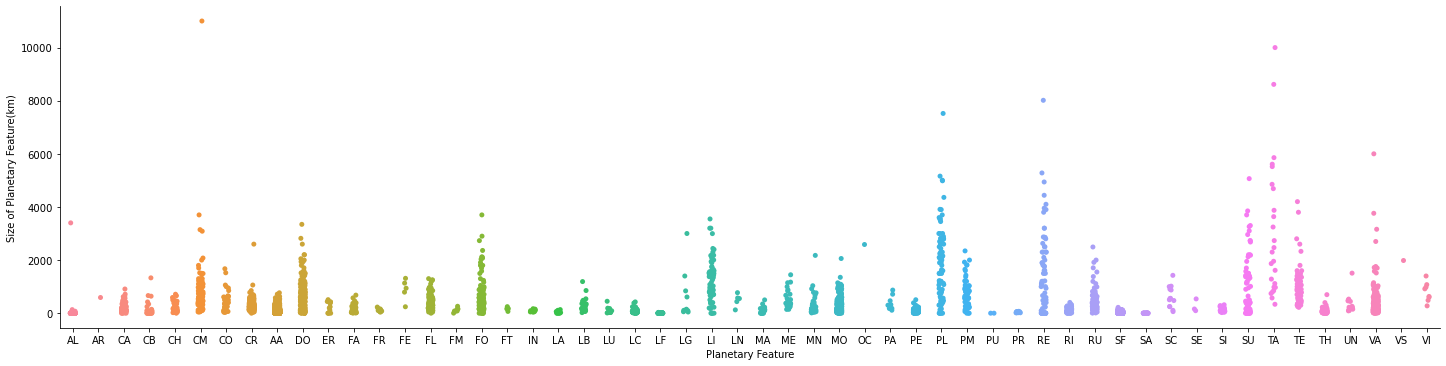

In [14]:
sns.catplot(data=df, x='Planetary Feature', y='Size of Planetary Feature(km)', aspect=4)

Now one can see the size of planetary feature, for each feature in the dataset. This is used instead of a hue function as it is not easy to look at with various values. The use of abbreviated feature names is to keep the graph neat and tidy. Considering the above questions and visualization, one could narrow the differences among size between the planets to only a few features of note. For example; terra(TA), regio(RE), planitia(PL), and chasma(CM) are a few of the largest planetary features in the dataset and could yield intersting results as to why one is larger on one planet than another.

## Bodies with the Most Features

<AxesSubplot:xlabel='Planet Name', ylabel='count'>

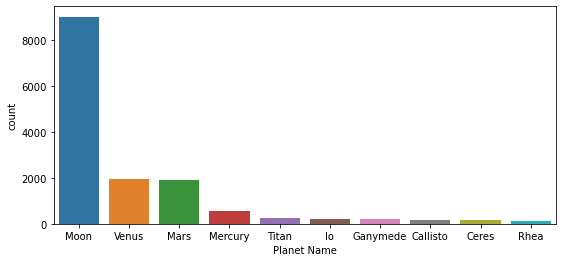

In [15]:
fig_dims = (9, 4)
plt.figure(figsize=fig_dims)
top_bodies = df['Planet Name'].value_counts().index[:10]
sns.countplot(data=df, x='Planet Name',order=top_bodies)

## Size of Features on Top 10 Bodies


In [16]:
# Only include the top 10 bodies with the most features in the new df
top_10 = df[(df['Planet Name'] == 'Moon')|(df['Planet Name'] == 'Venus')|(df['Planet Name'] == 'Mars')|(df['Planet Name'] == 'Mercury')|(df['Planet Name'] == 'Titan')|(df['Planet Name'] == 'Io')|(df['Planet Name'] == 'Ganymede')|(df['Planet Name'] == 'Callisto')|(df['Planet Name'] == 'Ceres')|(df['Planet Name'] == 'Rhea')]

# Narrow down this data frame to the max valules of their feature size and drop any duplicate features. We want max size per planet
top_10 = top_10.nlargest(500,'Size of Planetary Feature(km)',keep='first').drop_duplicates(subset='Planet Name')

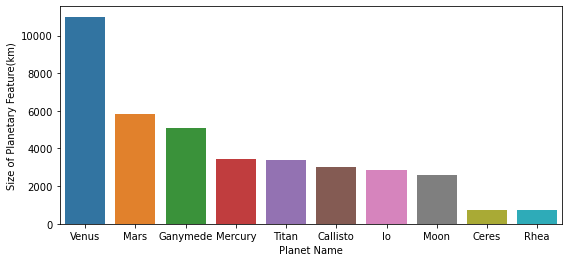

In [17]:
# Bar plot creation
fig_dims = (9, 4)
plt.figure(figsize=fig_dims)
bar_plot = sns.barplot(x='Planet Name', y='Size of Planetary Feature(km)', data=top_10)

A bar graph representing the top 10 bodies that have the most features within the dataset and how each planet's largest features compare to each others in size. For example, although the moon has the most features, its largest feature is smaller than those of Jupiter and Saturn's moons. Venus has the largest feature in the solar system; a giant chasma (a deep, elongated, steep-sided depression). These visualizations help us relate the planets by their feature size and allow us to ponder deeper questions. Does Venus have bigger mountains, craters, etc. than the moon and for what reason? Does it have to do with Venus' atmosphere, its place as the second planet away from the Sun, the Sun's gravity, etc. Although it does not answer any questions of correlation, it is interesting to compare and contrast between the solar bodies and delve deep into what makes these features so special.

## Conclusion

The following plots answer the three questions we posed for our Data Set. For question 1, we were curious about how the surface of the Moon, Venus, and Mars differed from each other. In order to visualize this question, we plotted each planet feature based on its longitude and latitude information. In addition, these surface maps showed the size of each feature adding more detail about the surface. The Venus plot illustrated that the surface of Venus was rough based on the abundance of mountains and elongated depressions on the surface. For the moon surface map, we saw a smoother surface showing a lot of craters and satellite features on its surface. Having a lack on mountains and depressions on its surface compared to Venus. Finally, Mars had a unique surface based on the rockfall features and large plateaus. Its surface had more mountains than the Moon, but not as many as Venus. 

In the next research question, we wanted to analyze if there was a correlation between crater size and its location on the surface. This relationship was evaluated using both surface maps and a pairplot. Looking at each surface map there seemed to be no relationship between size and location. The sizes of each crater looked random across the surfaces of each planet body. In order to enhance our analysis, we used a pairplot to show this relationship graphically. The pair plot did not show any linear relationship between the size and location. Lastly, after a linear regression analysis we found no correlation based upon the coeffient of determination.

For question 3, we wanted to compare the feature size of the planets and other bodies of the solar system to figure out why some bodies had larger features than others. In order to visualize this clearly, we plotted feature type by planet to see which abundant features were on which planet. Secondly, we looked at the size relative to feature type to narrow the list even further finding out which features would be the most interesting for our analysis. Lastly, we plotted the bodies with the most features by feature size to see if there was any correlation between the two. We found out that no, it did not necessarily matter what number of features were on each planet, there were still larger features on the ones with fewer features. For example, the Moon has the most documented features, but Venus has the largest in the solar system and Ganymede very few features but the third largest amongst the top 10 bodies. This research question just fueled further curiosity and led to other exciting questions.
